# SPAM DETECTION

In [1]:
#importing pandas 
import pandas as pd
#reading the spam csv file 
mail=pd.read_csv("spam.csv",encoding='latin-1')
mail.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
#chacking for the number of rows and columns in the data
mail.shape

(5572, 5)

In [3]:
#adding a new column to the dataset that represents 'ham' as 0 and 'spam' as 1 using LabelEncoder
from sklearn.preprocessing import LabelEncoder

#creating instance for LabelEncoder
labelencoder=LabelEncoder()

#adding new column to dataset names target_label which is the categorical form of the v1 column
mail['target_label']=labelencoder.fit_transform(mail['v1'])

In [4]:
mail.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,target_label
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0


In [5]:
X=mail['v2']
y=mail['target_label']

In [6]:
#importing stopwords 
#stopwords are the common words in english 
from nltk.corpus import stopwords

import string


#dividing the string text into list of words and also removing the stopwords
def string_to_word(message):
    no_punc=[i for i in message if i not in string.punctuation]
    no_punc=''.join(no_punc)
    return [i for i in no_punc.split() if i.lower() not in stopwords.words('english')]

In [7]:
#Demo of how the function - 'string_to_word' works
trial_message=mail['v2'][0]
print('Message:',trial_message)
print(string_to_word(trial_message))

Message: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
['Go', 'jurong', 'point', 'crazy', 'Available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'Cine', 'got', 'amore', 'wat']


In [8]:
#Importing and creating an instance of CountVectorizer estimator
from sklearn.feature_extraction.text import CountVectorizer
transformer=CountVectorizer(analyzer=string_to_word).fit(X)

In [9]:
#Demo of working of CountVectorizer
trial_message='You available your available great cell cell cell'
print(trial_message)

#transforming the trial message
t_trial_message=transformer.transform([trial_message])
print(t_trial_message)

You available your available great cell cell cell
  (0, 4776)	2
  (0, 5311)	3
  (0, 6846)	1


In [10]:
print(transformer.get_feature_names()[4776])

available


In [11]:
#sparse matrix with the count of the words in the text column
count_words=transformer.transform(X)

In [12]:
#shape of the count_words matrix
count_words.shape

(5572, 11304)

In [13]:
#importing and creating an instance of TfidfTransformer estimator
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(count_words)

In [14]:
#demo of working of TfidfTransformer
tfidf_trial_message=tfidf_transformer.transform(t_trial_message)
print(tfidf_trial_message)

  (0, 6846)	0.1933811002192669
  (0, 5311)	0.8348945178309634
  (0, 4776)	0.5153201860724931


In [15]:
tfdif_allX=tfidf_transformer.fit_transform(count_words)

In [16]:
print(tfdif_allX.shape)

(5572, 11304)


In [17]:
#WORD CLOUD of the most common words in spam mails
from wordcloud import WordCloud
spam_words=''.join(mail[mail['target_label']==1]['v2'])
word_cloud=WordCloud(width=500,height=500,max_font_size=300).generate(spam_words)


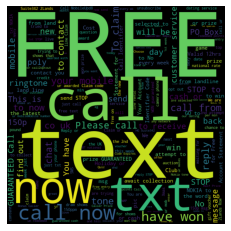

In [18]:
#displaying the created word cloud
import matplotlib.pyplot as plt
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [19]:
#splitting the data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(tfdif_allX,mail['target_label'],test_size=0.20)

In [20]:
#Applying Multinomial Naive Bayes classification
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train,y_train)
predicted_y=model.predict(X_test)

In [21]:
#displaying the confusions matrix and clasification report 
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predicted_y))
print(classification_report(y_test,predicted_y))

[[965   0]
 [ 43 107]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.71      0.83       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [22]:
#Applying KNN classification
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

In [23]:
pred_y=model.predict(X_test)

In [24]:
#displaying the confusions matrix and clasification report 
print(confusion_matrix(y_test,pred_y))
print(classification_report(y_test,pred_y))

[[965   0]
 [ 43 107]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.71      0.83       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [25]:
#Applying Support Vector Machine classification
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [26]:
y_pred = svclassifier.predict(X_test)

In [27]:
#displaying the confusions matrix and clasification report 
print(confusion_matrix(y_test,pred_y))
print(classification_report(y_test,pred_y))

[[965   0]
 [ 43 107]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.71      0.83       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115

